Comparação entre o algoritmo com poucos e muitos enxames, com a finalidade de decidir qual será utilizado nos experimentos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

%matplotlib inline

def algorithm_dataset(raw_data, algorithm_id, sorted_by="event", zero_values=False):
    data = raw_data.loc[[algorithm_id]]
    data = data.sort_values(by=sorted_by)
    if not zero_values:
        data = data[data.hypervolume != 0]
    return data

def comparison_dataset(ds):
    return ds.groupby(["algorithm","event"], as_index=False)["hypervolume"].mean()

def max_event(ds):
    return ds["event"].max()

column_labels = ["algorithm", "instance", "execution", "event", "hypervolume"] 
data_5_200 = pd.read_csv("../hypervolume/metrics-ms2mo-5-200.csv", 
                   delimiter=" ", 
                   header=None,     
                   names=column_labels,
                   index_col=column_labels[0])
data_30_60 = pd.read_csv("../hypervolume/metrics-ms2mo-30-60.csv", 
                   delimiter=" ", 
                   header=None,     
                   names=column_labels,
                   index_col=column_labels[0])

data = data_5_200.append(data_30_60)

In [2]:
ds_30_60 = algorithm_dataset(data, "MS2MO-30-60", zero_values=True)
ds_5_200 = algorithm_dataset(data, "MS2MO-5-200", zero_values=True)
ds_30_60_nz = algorithm_dataset(data, "MS2MO-30-60")
ds_5_200_nz = algorithm_dataset(data, "MS2MO-5-200")

datasets = {
    "poucos": comparison_dataset(ds_5_200),
    "muitos": comparison_dataset(ds_30_60),
    "poucos_nz": comparison_dataset(ds_5_200_nz),
    "muitos_nz": comparison_dataset(ds_30_60_nz),
}

min_event = min([max_event(ds) for ds in datasets.values()])

for k in datasets.keys():
    datasets[k] = datasets[k][:min_event+1]

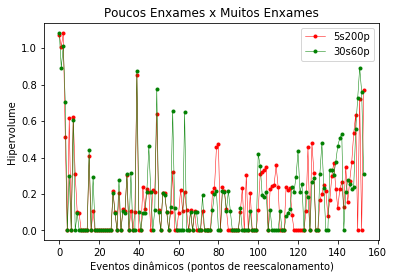

In [3]:
plt.title("Poucos Enxames x Muitos Enxames")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(datasets["poucos"].event, datasets["poucos"].hypervolume, "-ro", markersize=3, lw=.5, label="5s200p")
plt.plot(datasets["muitos"].event, datasets["muitos"].hypervolume, "-go", markersize=3, lw=.5, label="30s60p")
plt.legend()
plt.show()

In [4]:
s, p = wilcoxon(datasets["poucos"].hypervolume, datasets["muitos"].hypervolume)

if (p <= 0.05):
    print("p-value = ", p, "Há diferença significativa!")
else:
    print("p-value = ", p, "Não há diferença significativa.")

p-value =  0.731104204621323 Não há diferença significativa.


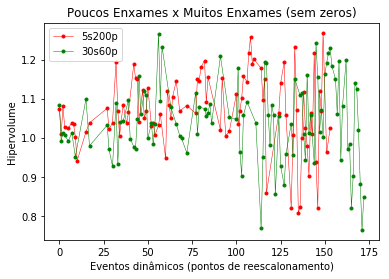

In [5]:
plt.title("Poucos Enxames x Muitos Enxames (sem zeros)")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(datasets["poucos_nz"].event, datasets["poucos_nz"].hypervolume, "-ro", markersize=3, lw=.5, label="5s200p")
plt.plot(datasets["muitos_nz"].event, datasets["muitos_nz"].hypervolume, "-go", markersize=3, lw=.5, label="30s60p")
plt.legend()
plt.show()

In [6]:
s, p = wilcoxon(datasets["poucos_nz"].hypervolume, datasets["muitos_nz"].hypervolume)

if (p <= 0.05):
    print("p-value = ", p, "Há diferença significativa!")
else:
    print("p-value = ", p, "Não há diferença significativa.")

ValueError: Unequal N in wilcoxon.  Aborting.